# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [3]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [4]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [5]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,...,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,...,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,...,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,...,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,...,233,2,.667,1,NaN,NaN,0,0,0,0


# Section I - Warm Up

In [6]:
import pandas as pd
import numpy as np

In [7]:
players = df.Player.tolist()
print(type(players[1]))
players[:10]

<class 'str'>


['Jake Allen',
 'Frederik Andersen',
 'Craig Anderson',
 'Richard Bachman',
 'Niklas Bäckström',
 'Jonathan Bernier',
 'Reto Berra',
 'Jean-Francois Berube',
 'Jordan Binnington',
 'Ben Bishop']

In [8]:
savePercentages = df["SV%"].tolist()
print(type(savePercentages[1]))
savePercentages[:10]

<class 'str'>


['.920',
 '.919',
 '.916',
 '.903',
 '.881',
 '.908',
 '.922',
 '.914',
 '.750',
 '.926']

In [9]:
savePercentages = df["SV%"].astype(float).tolist()
print(type(savePercentages[1]))
savePercentages[:10]

<class 'float'>


[0.92, 0.919, 0.916, 0.903, 0.881, 0.908, 0.922, 0.914, 0.75, 0.926]

In [10]:
len(players)

92

In [11]:
len(savePercentages)

92

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['figure.figsize'] = [22, 15]
plt.rcParams['figure.dpi'] = 100 

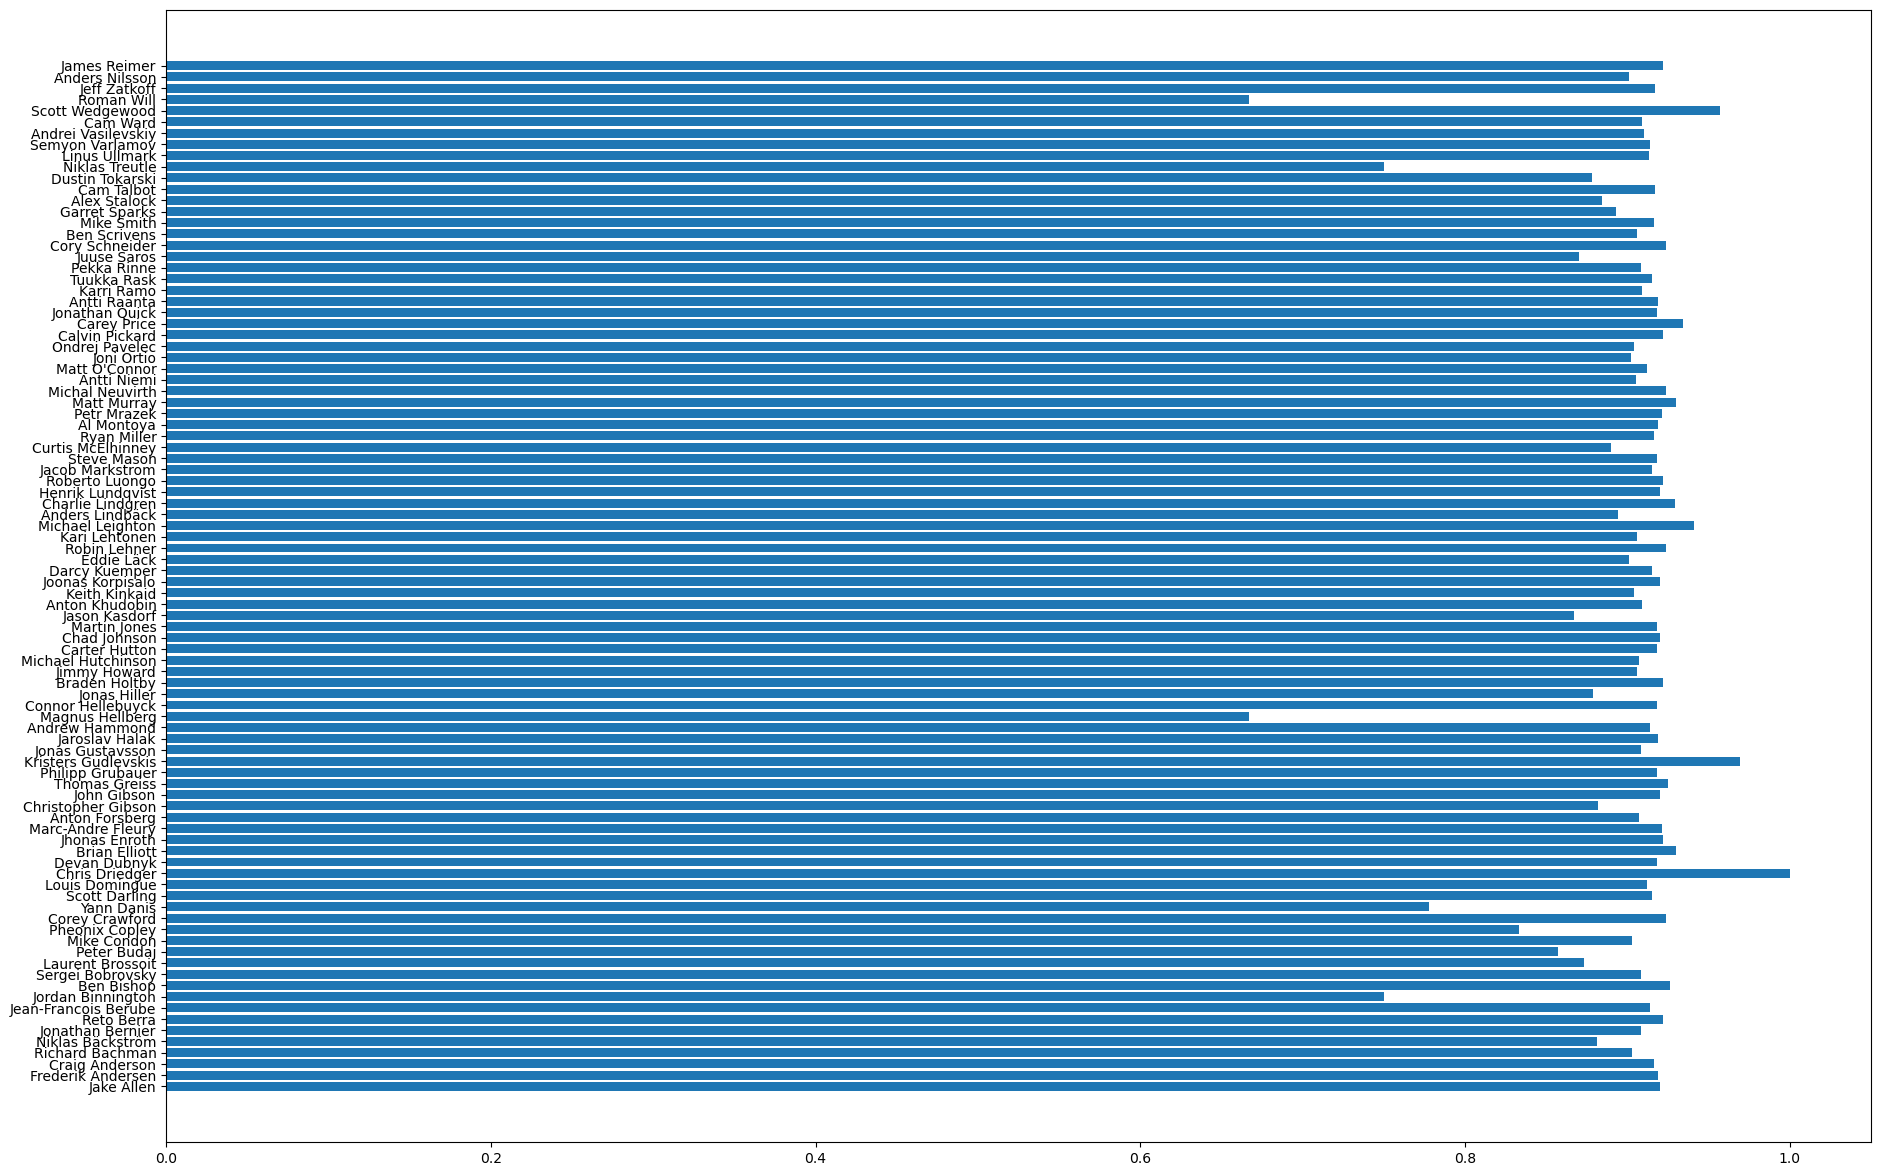

In [15]:
#plt.rcdefaults()
fig, ax = plt.subplots()

y = np.arange(len(players))

ax.barh(y, savePercentages, align='center')
ax.set_yticks(y)
ax.set_yticklabels(players)

plt.show()

In [16]:
goaliesData = { "Player" : players, "SV%" : savePercentages }
goaliesDF = pd.DataFrame(data = goaliesData)


In [17]:
goaliesDF.shape

(92, 2)

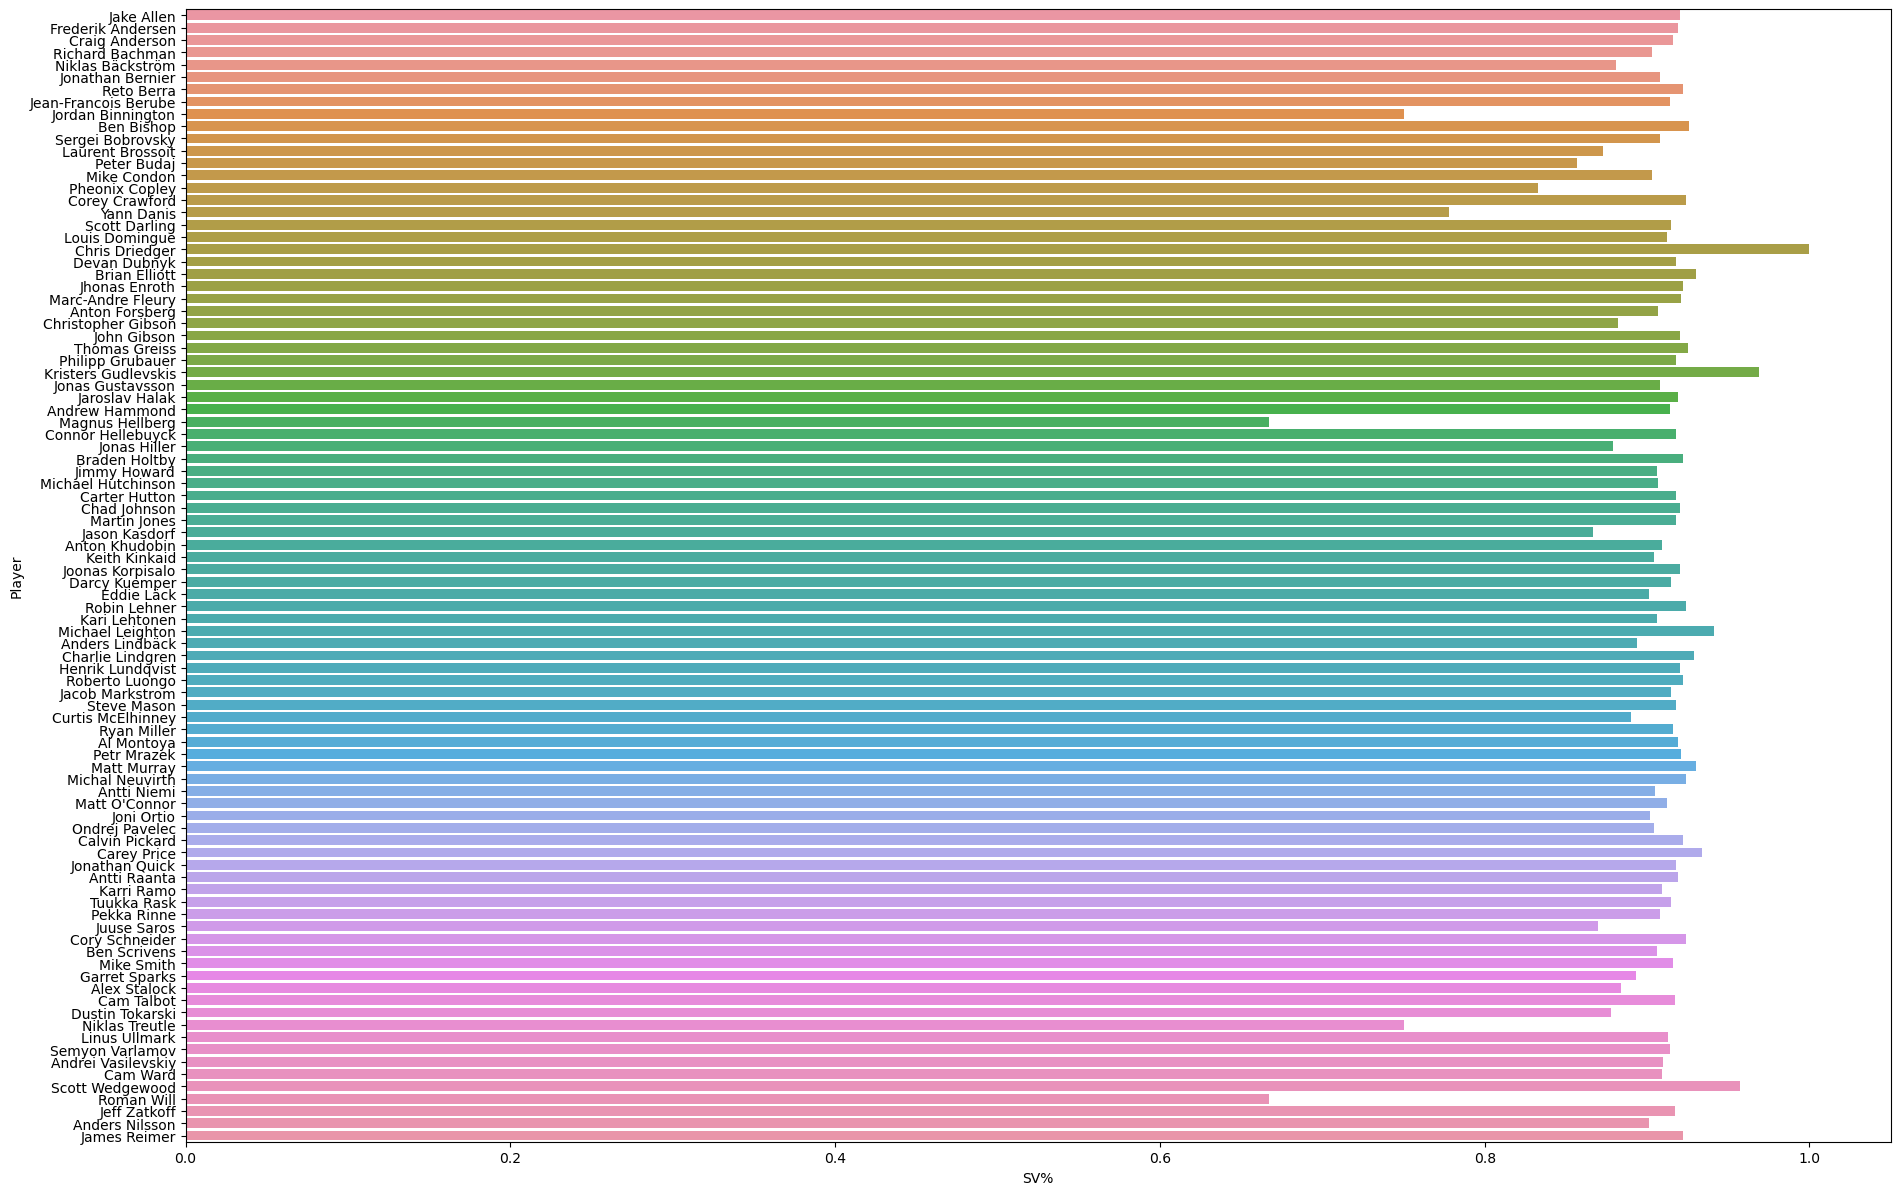

In [18]:
import seaborn as sns
ax = sns.barplot(x="SV%", y="Player", data=goaliesDF )

In [19]:
goaliesDF.loc[:10]

,Player,SV%
0,Jake Allen,0.920
1,Frederik Andersen,0.919
2,Craig Anderson,0.916
3,Richard Bachman,0.903
4,Niklas Bäckström,0.881
5,Jonathan Bernier,0.908
6,Reto Berra,0.922
7,Jean-Francois Berube,0.914
8,Jordan Binnington,0.750
9,Ben Bishop,0.926


In [20]:
goaliesDF.sort_values(by=["SV%"], ascending=False, inplace=True)

In [25]:
goaliesDF.iloc[:20,:]

,Player,SV%
19,Chris Driedger,1.000
29,Kristers Gudlevskis,0.969
87,Scott Wedgewood,0.957
50,Michael Leighton,0.941
68,Carey Price,0.934
21,Brian Elliott,0.930
61,Matt Murray,0.930
52,Charlie Lindgren,0.929
9,Ben Bishop,0.926
27,Thomas Greiss,0.925


In [173]:
goaliesDF.shape

(92, 2)

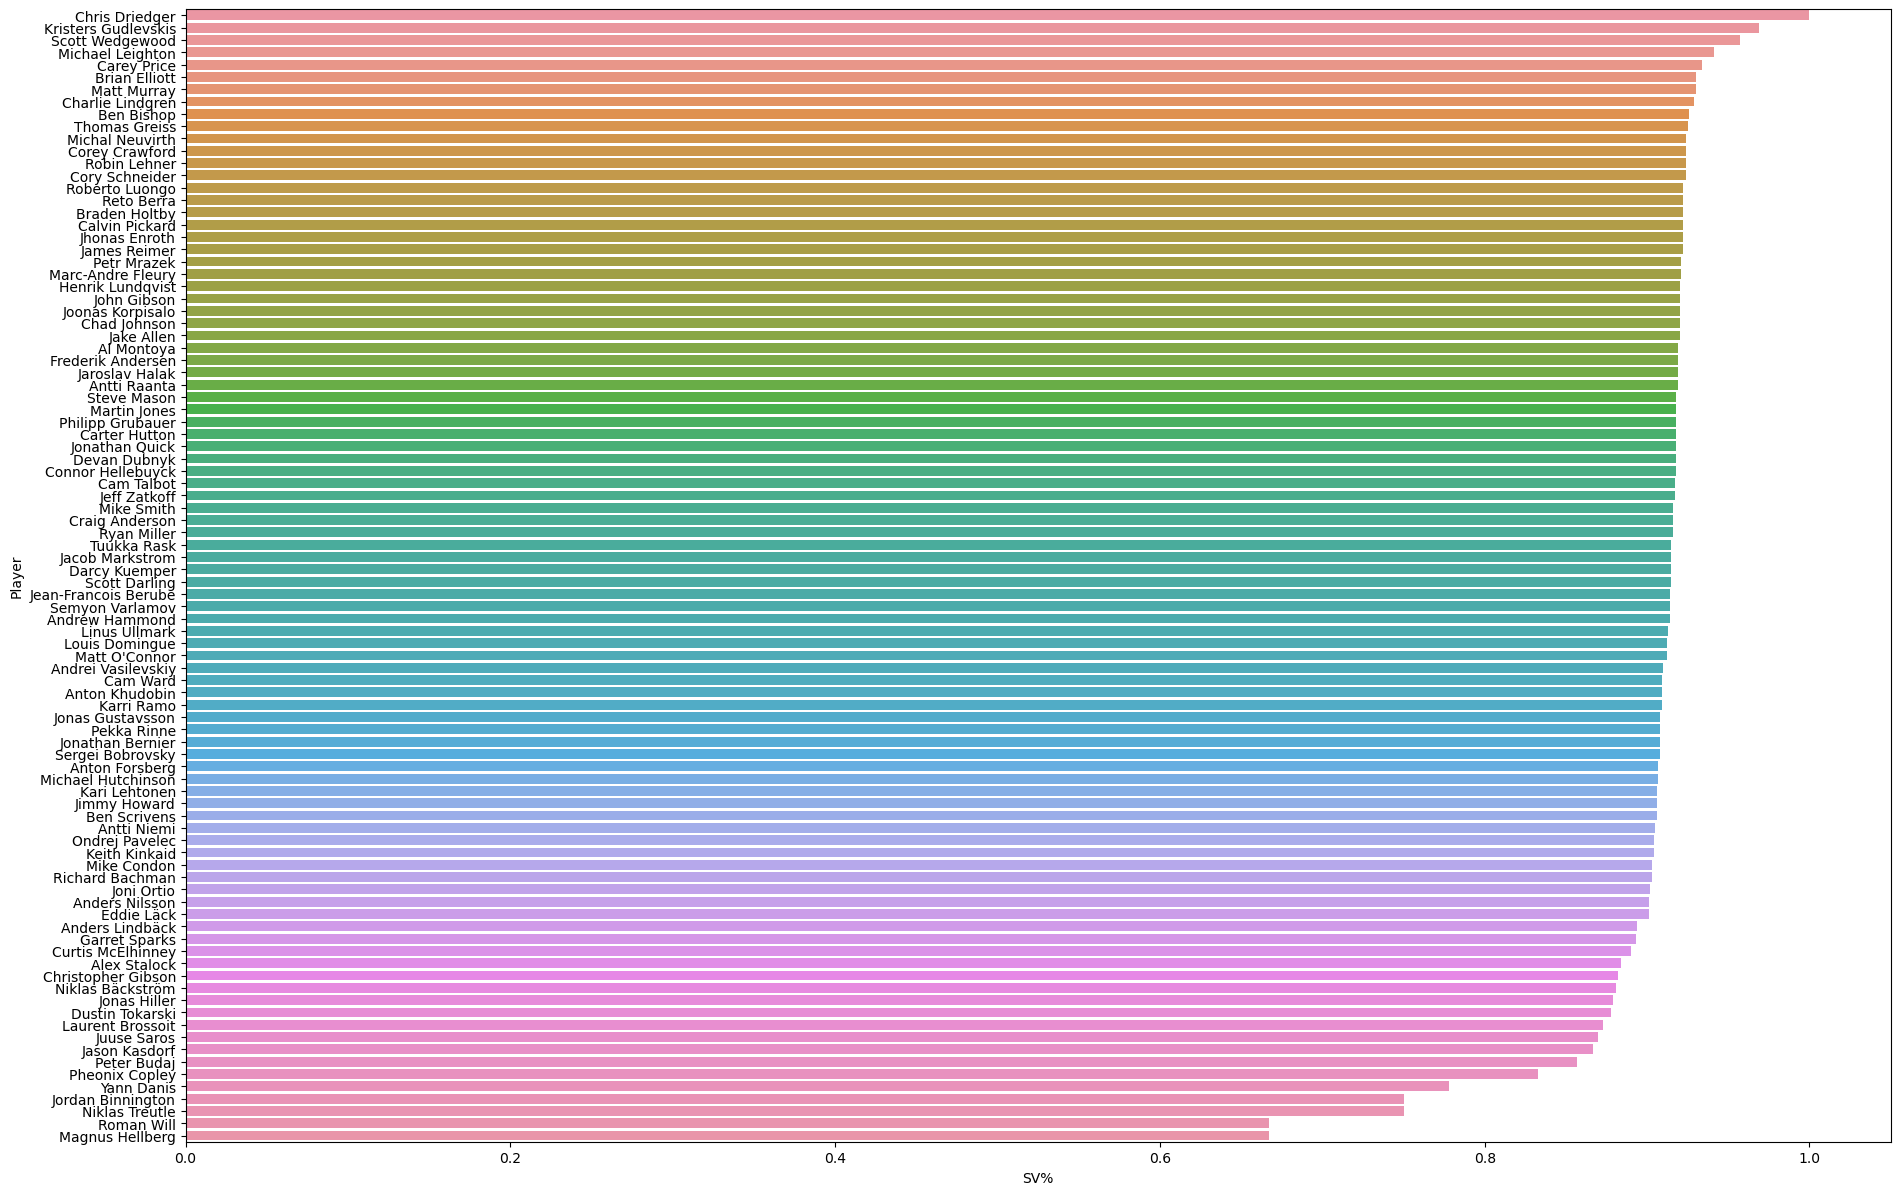

In [41]:
sns.axes_style("darkgrid")
ax = sns.barplot(x="SV%", y="Player", data=goaliesDF)
fig = ax.get_figure()
fig.savefig("barchart.png")

# Section II - Data Acquisition

download raw data from https://statsapi.web.nhl.com/api/v1/game/[GAME_ID]/feed/live/
manual load into dataframe

Example usage shown and commented below

In [175]:
#imports
from ift6758.data.functions import loadstats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd
import json

#preload and download from web if not acquired (set to false to download all data)
downloaded = True
if not downloaded:
    datayear = 2016
    while datayear <= 2020:
        loadstats(datayear,'./data/')
        datayear += 1
    
#outputs games that aren't played up to 7 in playoffs or max games in regular season
dfs = loadstats(2019,'./data/')
# print(df2019.iloc[:,1270])
# print(df2019['2019020001'])

size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 1428


In [176]:
# playbyplay shown
pd.DataFrame.from_dict(dfs['2019020001']['liveData']['plays']['allPlays']).head()

,result,about,coordinates,players,team
0,"{'event': 'Game Scheduled', 'eventCode': 'TOR1...","{'eventIdx': 0, 'eventId': 1, 'period': 1, 'pe...",{},NaN,NaN
1,"{'event': 'Period Ready', 'eventCode': 'TOR5',...","{'eventIdx': 1, 'eventId': 5, 'period': 1, 'pe...",{},NaN,NaN
2,"{'event': 'Period Start', 'eventCode': 'TOR8',...","{'eventIdx': 2, 'eventId': 8, 'period': 1, 'pe...",{},NaN,NaN
3,"{'event': 'Faceoff', 'eventCode': 'TOR9', 'eve...","{'eventIdx': 3, 'eventId': 9, 'period': 1, 'pe...","{'x': 0.0, 'y': 0.0}","[{'player': {'id': 8475166, 'fullName': 'John ...","{'id': 10, 'name': 'Toronto Maple Leafs', 'lin..."
4,"{'event': 'Goal', 'eventCode': 'TOR10', 'event...","{'eventIdx': 4, 'eventId': 10, 'period': 1, 'p...","{'x': 85.0, 'y': -1.0}","[{'player': {'id': 8480801, 'fullName': 'Brady...","{'id': 9, 'name': 'Ottawa Senators', 'link': '..."


In [177]:
# raw data shown in first entry
dfs.iloc[:,0]

copyright    NHL and the NHL Shield are registered trademar...
gamePk                                              2019020001
link                         /api/v1/game/2019020001/feed/live
metaData     {'wait': 10, 'timeStamp': '20191106_204348', '...
gameData     {'game': {'pk': 2019020001, 'season': '2019202...
liveData     {'plays': {'allPlays': [{'result': {'event': '...
Name: 2019020001, dtype: object

In [17]:
# number of regular season games
print(dfs.iloc[:,0]['metaData']['playoffIndex'])
# number of total games
print(dfs.shape[1])

1271
1428


# Saved for later

In [ ]:

class NHLData:
    
    def __init__(self):
        pass
    
    def getGameStats(self, gameID):
        pass
    
    

# Section III - Interactive Debugging Widget

Use the sliders below to see the play by play for each games

In [18]:
#define the playoff index & game size
index = dfs.iloc[:,0]['metaData']['playoffIndex']
gamesize = dfs.shape[1]
# number of plays in game 1 regular season
game1plays = len(dfs.iloc[:,0]['liveData']['plays']['allPlays'])

#game type selector
wType = widgets.RadioButtons(
        options=['Regular', 'PlayOffs'],
        value='Regular', # Defaults to 'Regular'
        #layout={'width': 'max-content'}, # If the items' names are long
        description='Game Type:',
        disabled=False
    )
    
#game selector
wGameIndex = widgets.IntSlider(
    value=0,
    min=0,
    max=index-1,
    step=1,
    description='Game Index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#play selector
wPlays = widgets.IntSlider(
        value=0,
        min=0,
        max=game1plays-1,
        step=1,
        description='Play Index:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)


output2 = widgets.Output()
#debug
#display(wType,wGameIndex,wPlays,output2)

# Define a function that updates the content of GameIndex based on GameType
def on_value_changeT(change):
    if wType.value == 'Regular':
        wGameIndex.min = 0
        wGameIndex.max = max(index-1,0)
        wGameIndex.value=0
    elif wType.value == 'PlayOffs':
        wGameIndex.max = max(gamesize-1,0)
        wGameIndex.min = min(index,0)
        wGameIndex.value = min(wGameIndex.max,wGameIndex.min)
    else:
        print('Game Type Selector Error!')
    #debug
    # with output2:
    #     print(change['new'])
    #     print(wGameIndex.min)
    #     print(wGameIndex.max)

wType.observe(on_value_changeT, names='value')

# Define a function that updates the number of Plays based on GameIndex
def on_value_changeI(change):
    wPlays.value = 0
    wPlays.max = max(len(dfs.iloc[:,wGameIndex.value]['liveData']['plays']['allPlays'])-1,0)
    #debug 
    # with output2:
    #     print(change['new'])
    #     print(wPlays.max)
    #     print(wPlays.value)
        
wGameIndex.observe(on_value_changeI, names='value')

#functions that plots the plays depending on the widget selection
def plotPlay(wTypei, wGameIndexi,wPlaysi):
    
    coordinates = {}
    #print useful info here
    print(f'Gametype: {wTypei}, Game Index: {wGameIndexi}, Play Index: {wPlaysi}')
    print(f'gameID: {dfs.iloc[:,wGameIndexi]["gamePk"]}, time: {dfs.iloc[:,wGameIndexi]["gameData"]["datetime"]["dateTime"]}')
    print(f'Away: {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["away"]["abbreviation"]} vs {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["home"]["abbreviation"]} :Home')
    
    #try to find coordinates of plays
    try:
        coordinates = dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi]['coordinates']
    except Exception as ex:
        print(ex)
    

    #change coordinate system and show image
    img = mpimg.imread('./figures/nhl_rink.png')
    imgplot = plt.imshow(img, extent = [-100 ,100,-42.5,42.5])
    
    #if coordinates exist then plot on image
    if coordinates:
        plt.plot(coordinates['x'],coordinates['y'],'yo', markersize=30)
    plt.show()
    
    #print play info if it exist
    try:
        print(json.dumps(dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi], ensure_ascii=False, indent=4))
    except Exception as ex:
        print(ex)
    
#widget initilizer
widgets.interact(plotPlay,  
    #game type selector
    wTypei = wType,    
    #game selector
    wGameIndexi = wGameIndex,    
    #play selector
    wPlaysi = wPlays,
)



interactive(children=(RadioButtons(description='Game Type:', options=('Regular', 'PlayOffs'), value='Regular')…

<function __main__.plotPlay(wTypei, wGameIndexi, wPlaysi)>

# Section IV - Tidy Data

In [ ]:
import os
import pandas as pd

def processGameData(gameJSON):
    with open(gameJSON) as gameJson:
        print(pd.json_normalize(gameJson).head(10))
    return "gameId", "df"
        

for folder in os.listdir('./data'):
    for game in os.listdir( os.path.join("./data", folder)):
        gameJSON = os.path.join( "./data", folder, game )
        print( gameJSON )
        gameId, gameDF = processGameData(gameJSON)

In [69]:
import pandas as pd
pd.options.display.max_columns = None

In [95]:
import json

def getPlayerDetails( playerJson ):
    #print("In - 1")
    x = pd.json_normalize(playerJson )
    #print(type(x))
    #print(x)
    x = x.applymap(lambda x : "Shooter" if x == "Scorer" else x )
    x.drop_duplicates(subset="playerType", keep=False, inplace=True)
    #print(x.columns)
    y = x.set_index("playerType")
    #print(type(y["player.fullName"]))
    #print(y["player.fullName"])
    #print("Out - 1")
    return y["player.fullName"]


def getPlayerDetails2( playerJson ):
    print("input: ", type(playerJson))
    print(playerJson)
    x = pd.json_normalize(playerJson)
    print("output: ", type(x))
    print("|^|", x)
    return x


def getPlayerDetails3( playerJson ):
    #print("input: ", type(playerJson))
    #print(playerJson)
    x = pd.json_normalize(playerJson )
    #print("output: ", type(x))
    #print( x.loc[0,0])


def getPlayerDetails4( playerJson ):
    #print("input: ", type(playerJson))
    #print(playerJson)
    k = playerJson.apply(getPlayerDetails)
    #print( "output: ", type(k) )
    #print( k )
    return k.iloc[0]
    
    
with open("./data/2016/2016020166.json") as gameJson:
    data = json.load(gameJson)
    #print([key for key in data])
    #print([key for key in data["liveData"]])
    #print(data["gameData"]["game"]["pk"])
    #print(data["gameData"]["game"]["season"])
    #print(data["gameData"]["game"]["type"])
    #print(data["gameData"]["datetime"]["dateTime"])
    #print(data["gameData"]["datetime"]["endDateTime"])
    #print(type(data["liveData"]["plays"]["allPlays"]))
 
    #playDF = pd.json_normalize( data = data["liveData"]["plays"]["allPlays"] )
    playDF = pd.json_normalize( data = data, record_path = ["liveData", "plays", "allPlays"], meta = [ "gamePk" ] )
    #display(playDF.head())
    shotsAndGoalsDF = playDF[playDF["result.event"].isin(["Shot","Goal"])]
    #display( shotsAndGoalsDF.head() )

    playersDF = pd.DataFrame(shotsAndGoalsDF["players"]) #.apply( getPlayerDetails )
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    #print(type(playersDF))
    shooterAndGolieDF = playersDF.apply( getPlayerDetails4, axis = 1, result_type="expand" )
    #shooterAndGolieDF
    shotsAndGoalsDF = shotsAndGoalsDF.join(shooterAndGolieDF)
    #display(shotsAndGoalsDF[shotsAndGoalsDF["result.event"].isin(["Goal"])].head())
    # display(shotsAndGoalsDF.columns)
    periodsDF = pd.json_normalize( data = data, record_path = ["liveData", "linescore", "periods"]  )
    #display(periodsDF.loc[:, ["num", "home.rinkSide", "away.rinkSide"]])
    teamsDF = pd.json_normalize( data = data["gameData"]["teams"] )
    teamNames = teamsDF.loc[0, ["home.name", "away.name"]]
    # display(teamNames)
    teamNamesDF =  periodsDF.apply( lambda x : teamNames, axis='columns', result_type="expand" )
    # display(teamNamesDF)
    periodsDF = periodsDF.join( teamNamesDF ).drop(['periodType', 'startTime', 'endTime', 'ordinalNum', \
                                                    'home.goals', 'home.shotsOnGoal', 'away.goals', 'away.shotsOnGoal' ], axis=1)
    #periodsDF.set_index("num", inplace=True) 
    shotsAndGoalsDF2 = shotsAndGoalsDF.drop(['result.event', 'result.eventCode', 'result.description', \
                                             'about.eventIdx', 'about.eventId', 'about.periodType', \
                                             'about.ordinalNum', 'about.periodTime', 'about.periodTimeRemaining', \
                                             'about.goals.away', 'about.goals.home', 'players', 'team.id', \
                                             'team.link', 'team.triCode', 'result.penaltySeverity', 'result.penaltyMinutes', \
                                             'result.strength.code', 'result.gameWinningGoal', 'Goalie'],  axis=1).reset_index() 
    #display( periodsDF  )
    #display( shotsAndGoalsDF2 )
    shotsAndGoalsPeriodsDF = pd.DataFrame( shotsAndGoalsDF2['about.period'] )
    shotsAndGoalsPeriodsDF2 = shotsAndGoalsPeriodsDF.merge(periodsDF,  left_on='about.period', right_on='num')
    #display(shotsAndGoalsPeriodsDF2)
    shotsAndGoalsDF3 =  shotsAndGoalsDF2.join(shotsAndGoalsPeriodsDF2, lsuffix='_left', rsuffix='_right')
    shotsAndGoalsDF4 = shotsAndGoalsDF3.drop(['index', 'about.period_right', 'num'], axis=1)
    display( shotsAndGoalsDF4.columns )
                                
                    
    
#df2 = df1.apply( getPlayerDetails3, result_type="expand" )
#df2
#shotsAndGoalsDF.columns
#i = 0
#for play in data["liveData"]["plays"]["allPlays"]:
#    i += 1
#    print( i, play["about"]["period"], play["about"]["dateTime"], play["result"]["event"])
    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Index(['index', 'result.eventTypeId', 'about.period_left', 'about.dateTime',
       'coordinates.x', 'coordinates.y', 'team.name', 'result.secondaryType',
       'result.strength.name', 'result.emptyNet', 'gamePk', 'Shooter',
       'about.period_right', 'num', 'home.rinkSide', 'away.rinkSide',
       'home.name', 'away.name'],
      dtype='object')

In [72]:
series_df = pd.DataFrame( shotsAndGoalsDF['about.period'] )
merged_DF = series_df.merge(periodsDF,  left_on='about.period', right_on='num')

,about.period,num,home.rinkSide,away.rinkSide,home.name,away.name
20,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
21,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
22,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
23,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
24,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
25,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
26,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
27,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
28,2,2,right,left,Tampa Bay Lightning,New Jersey Devils
29,2,2,right,left,Tampa Bay Lightning,New Jersey Devils



# code 

    shotsAndGoalsDF2 = shotsAndGoalsDF.drop( ['result.event', 'result.eventCode', 'result.description', \
                                            'about.eventIdx', 'about.eventId', 'about.ordinalNum', \
                                            'about.goals.away','about.goals.home', 'players', 'team.link',  \
                                            'result.penaltySeverity', 'result.penaltyMinutes', \
                                            'result.gameWinningGoal'], axis=1).reset_index()
periodsDF = periodsDF.join( teamNamesDF ).drop(['periodType', 'startTime', 'endTime', 'ordinalNum', \
                                                    'home.goals', 'home.shotsOnGoal', 'away.goals', 'away.shotsOnGoal' ], axis=1)
    #periodsDF.set_index("num", inplace=True) 
    shotsAndGoalsDF2 = shotsAndGoalsDF.drop( ['result.event', 'result.eventCode', 'result.description', \
                                            'about.eventIdx', 'about.eventId', 'about.ordinalNum', \
                                            'about.goals.away','about.goals.home', 'players', 'team.link',  \
                                            'result.penaltySeverity', 'result.penaltyMinutes', \
                                            'result.gameWinningGoal'], axis=1)
    
    shotsAndGoalsDF3 = shotsAndGoalsDF2.merge(periodsDF, left_on='about.period', right_on='num')
    display( shotsAndGoalsDF2.head() )       

In [ ]:
from ift6758.data.functions import loadstats
import os

def processGameData(gameJSON):
    """
    """
    with open( gameJSON ) as gameJson:
        try:
            data = json.load(gameJson)
            #print([key for key in data])
            gameID = data["gameData"]["game"]["pk"]
            gameSeason = data["gameData"]["game"]["season"]
            #print(data["gameData"]["game"]["pk"])
            #print(data["gameData"]["game"]["season"])
            #print(data["gameData"]["game"]["type"])
            #print(data["gameData"]["datetime"]["dateTime"])
            #print(data["gameData"]["datetime"]["endDateTime"])
            #print(type(data["liveData"]["plays"]["allPlays"]))
        
            playDF = pd.json_normalize(data["liveData"]["plays"]["allPlays"])
            #print(playDF.columns)
            shotsAndGoalsDF = playDF[playDF["result.event"].isin(["Shot","Goal"])]
            
            # TODO: reset index
            # TODO: add game id column
            # TODO: add shooter and goalie columns 
            # TODO: rename Columns
            # TODO: drop unnecessary columns 
        except Exception as inst:
            print(inst)
            
        else:
            return shotsAndGoalsDF
        


    
def getNHLData( listOfSeasons ):
    """
        function to convert all events of every game into a pandas dataframe.
        Use your tool to download data from the 2016-17 season all the way up to the 2020-21 season. 

    """
    # get all games for the requsted period by calling above funciion
    # keep adding to a pandas data frame
    # Columns = [ game time/period information, game ID, team information (which team took the shot), indicator if its a shot or a goal, the on-ice coordinates, the shooter and goalie name (don’t worry about assists for now), shot type, if it was on an empty net, and whether or not a goal was at even strength, shorthanded, or on the power play ]
    for season in listOfSeasons:
        print("Loading data for {season}", season)
        loadstats(season, './data')

    NHLDataDF = pd.DataFrame()
    
    for season in listOfSeasons:
        for game in os.listdir( os.path.join("./data", str(season))):
            gameJSON = os.path.join( "./data", str(season), game )
            print("Processing game data ", gameJSON)
            try:
                gameDF = processGameData(gameJSON)
                
            except Exception as inst:
                print(inst) 
                
            else:
                print(type(gameDF))
                NHLDataDF = NHLDataDF.append(gameDF)
                print(NHLDataDF.shape)
              

    return NHLDataDF


df1 = getNHLData(list(range(2016,2020)))
print(df1.shape)
display(df1.head())

In [120]:
display(df1.players[:1])

9    [{'player': {'id': 8477205, 'fullName': 'Andre...
Name: players, dtype: object

In [140]:

def func(x):
    #print( pd.json_normalize(x, None, ["playerType"]))
    #print( pd.json_normalize(x) )
    #print(x)
    #print("*----*")
    return pd.json_normalize(x, None, ["playerType"]) # pd.json_normalize(x)
    
df2 = df1.players.apply( func )
df2.head()

9       playerType  player.id player.fullName       ...
16      playerType  player.id player.fullName       ...
27      playerType  player.id player.fullName       ...
32      playerType  player.id     player.fullName   ...
33      playerType  player.id player.fullName       ...
Name: players, dtype: object

In [ ]:
def Shooter( playerList ):
    
def getPlayerDetails( playerList ):
    #print(playerList[0]["player"]["fullName"])
    #print(playerList[0]["playerType"])
    #print(playerList[1]["player"]["fullName"])
    #print(playerList[1]["playerType"])
    return pd.DataFrame({ playerList[0]["playerType"] : [ playerList[0]["player"]["fullName"]], playerList[1]["playerType"] : [ playerList[1]["player"]["fullName"] ] })


print 
#for player in shotsAndGoalsDF["players"]:
#    print(getPlayerDetails(player))
#    #playerDetailsDF.append( getPlayerDetails(player) )



In [58]:
(playDF[playDF["result.event"].isin(["Shot","Goal"])].players

9    [{'player': {'id': 8477205, 'fullName': 'Andre...
Name: players, dtype: object

In [ ]:
data["liveData"]["plays"]["allPlays"]

In [ ]:
data

# Section - Redo Tidy

In [ ]:
from ift6758.data.functions import loadstats

import os
import json
import pandas as pd

pd.options.display.max_columns = None

def processShootersAndGoalies(playerJson):
    """
    """
    # normalize json
    x = pd.json_normalize(playerJson )
    # rename scorer to shooter
    x = x.applymap(lambda x : "Shooter" if x == "Scorer" else x )
    # drop 'assists'
    x.drop_duplicates(subset="playerType", keep=False, inplace=True)
    # reset index to player type
    y = x.set_index("playerType")
    # return series fullname
    return y["player.fullName"]
    
    
    
def getShootersAndGoalies(  playerJson ):
    """
    """
    shootersAndGoalies = playerJson.apply( processShootersAndGoalies )
    return shootersAndGoalies.iloc[0]
    
def processGameData(gameJSON):
    """
    """
    with open( gameJSON ) as gameJson:
        try:
            # try loading the json
            data = json.load(gameJson)
            
            # get gameid and season
            gameID = data["gameData"]["game"]["pk"]
            gameSeason = data["gameData"]["game"]["season"]
            
            #print(data["gameData"]["game"]["pk"])
            #print(data["gameData"]["game"]["season"])
            #print(data["gameData"]["game"]["type"])
            #print(data["gameData"]["datetime"]["dateTime"])
            #print(data["gameData"]["datetime"]["endDateTime"])
            #print(type(data["liveData"]["plays"]["allPlays"]))
            
            # Get all plays data
            #playDF = pd.json_normalize( data = data["liveData"]["plays"]["allPlays"] )
            playDF = pd.json_normalize( data = data, record_path = ["liveData", "plays", "allPlays"], meta = [ "gamePk" ] )
            #playDF = pd.json_normalize( data , record_path = "allPlays" )
            
            # Filter out goals and shots into a dataframe
            shotsAndGoalsDF = playDF[playDF["result.event"].isin(["Shot","Goal"])]
            
            # extract players data as a dataframe
            playersDF = pd.DataFrame(shotsAndGoalsDF["players"])
            
            # Get a data frame with Shooters and Goalie columns
            #  - traverse each row of playersDF, and get a DF with two new columns
            shooterAndGolieDF = playersDF.apply( getShootersAndGoalies, axis = 1, result_type="expand" )
            #gameIdAndSeasonDF = playersDF.apply( lambda x: pd.Series([, 2], index=['foo', 'bar']), axis=1)
            
            # Update 'shots and goals' dataframe with 'shooters and goalies'
            shotsAndGoalsDF = shotsAndGoalsDF.join(shooterAndGolieDF)
            
            periodsDF = pd.json_normalize( data = data, record_path = ["liveData", "linescore", "periods"]  )

            teamsDF = pd.json_normalize( data = data["gameData"]["teams"] )
            teamNames = teamsDF.loc[0, ["home.name", "away.name"]]

            teamNamesDF =  periodsDF.apply( lambda x : teamNames, axis='columns', result_type="expand" )
            
            # columnsToDrop = periodsDF.columns - columnsToKeep
            
            drop = ['periodType', 'startTime', 'endTime', 'ordinalNum', 'home.goals', 'home.shotsOnGoal', \
                    'away.goals', 'away.shotsOnGoal' ]
            #print(drop)
            keep = ['num', 'home.rinkSide', 'away.rinkSide', 'home.name', 'away.name']
            #print( "dddd -> ", periodsDF.columns - drop )
            drop = [column for column in periodsDF.columns.array if column not in keep ]
            #print(drop)
            periodsDF = periodsDF.join( teamNamesDF ).drop( drop, axis=1)
            #print(type(periodsDF.columns))
            #print(type(periodsDF.columns.array))
            # columnsToDrop = shotsAndGoalsDF2.columns - ColumnsToKeep
            drop = ['result.event', 'result.eventCode', 'result.description', \
             'about.eventIdx', 'about.eventId', 'about.periodType', \
             'about.ordinalNum', 'about.periodTime', 'about.periodTimeRemaining', \
             'about.goals.away', 'about.goals.home', 'players', 'team.id', \
             'team.link', 'team.triCode', 'result.penaltySeverity', 'result.penaltyMinutes', \
             'result.strength.code', 'result.gameWinningGoal' ]
            #print(drop)
            keep = ['result.eventTypeId', 'about.period', 'about.dateTime', 'coordinates.x', 'coordinates.y', \
                    'team.name', 'result.secondaryType', 'result.strength.name', 'result.emptyNet', 'gamePk', \
                    'Goalie', 'Shooter']
            drop = [ column for column in shotsAndGoalsDF.columns.array if column not in keep ]
            #print(drop)

            shotsAndGoalsDF2 = shotsAndGoalsDF.drop( drop,  axis=1).reset_index() 

            shotsAndGoalsPeriodsDF = pd.DataFrame( shotsAndGoalsDF2['about.period'] )
            shotsAndGoalsPeriodsDF2 = shotsAndGoalsPeriodsDF.merge(periodsDF,  left_on='about.period', right_on='num')

            shotsAndGoalsDF3 = shotsAndGoalsDF2.join(shotsAndGoalsPeriodsDF2, lsuffix='_left', rsuffix='_right')
            # columnsToDrop = shotsAndGoalsDF3.columns - ColumnsToKeep
            drop = ['index', 'about.period_right', 'num', 'Assist']
            #print(drop)
            keep = ['result.eventTypeId', 'about.period_left', 'about.dateTime', 'coordinates.x', \
                    'coordinates.y', 'team.name', 'result.secondaryType', 'result.strength.name', \
                    'result.emptyNet', 'gamePk', 'Shooter', 'Goalie', 'home.rinkSide', \
                    'away.rinkSide', 'home.name', 'away.name']
                    
            drop = [column for column in shotsAndGoalsDF3.columns.array if column not in keep ]
            #print(drop)
            shotsAndGoalsDF4 = shotsAndGoalsDF3.drop( drop, axis=1 )
            # TODO: rename Columns
            
        except Exception as inst:
            print("An excetion occured :: ", inst)
            
        else:
            return shotsAndGoalsDF4
        
        
def getNHLData( listOfSeasons ):
    """
        function to convert all events of every game into a pandas dataframe.
        Use your tool to download data from the 2016-17 season all the way up to the 2020-21 season. 

    """
    # get all games for the requsted period by calling above funciion
    # keep adding to a pandas data frame
    # Columns = [ game time/period information, game ID, team information (which team took the shot), 
    #             indicator if its a shot or a goal, the on-ice coordinates, the shooter and goalie name (don’t worry about assists for now), 
    #             shot type, if it was on an empty net, and whether or not a goal was at even strength, shorthanded, or on the power play ]
    
    for season in listOfSeasons:
        #print("Loading data for {season}", season)
        loadstats(season, './data')

    NHLDataDF = pd.DataFrame()
    
    for season in listOfSeasons:
        for game in os.listdir( os.path.join("./data", str(season))):
            gameJSON = os.path.join( "./data", str(season), game )
            #print("Processing game data ", gameJSON)
            try:
                gameDF = processGameData(gameJSON)
                
            except Exception as inst:
                print(inst) 
                
            else:
                #print(type(gameDF))
                NHLDataDF = NHLDataDF.append(gameDF)
                #print(NHLDataDF.shape)
              

    return NHLDataDF


df1 = getNHLData(list(range(2016,2017)))
df1.head()

Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016030147. Game not found.
Error code: 404 at gameID:2016030176. Game not found.
size of data in regular season & playoffs: 1332
Processing game data  ./data/2016/2016020166.json
Processing game data  ./data/2016/2016020952.json
Processing game data  ./data/2016/2016020469.json
Processing game data  ./data/2016/2016020326.json
Processing game data  ./data/2016/2016030133.json
Processing game data  ./data/2016/2016030233.json
Processing game data  ./data/2016/2016020686.json
Processing game data  ./data/2016/2016020146.json
Processing game data  ./data/2016/2016020156.json
Processing game data  ./data/2016/2016020072.json
Processing game data  ./data/2016/2016020076.json
Processing game data  ./data/2016/2016020901.json
Processing game data  ./data/2016/2016020857.json
Processing game data  ./data/2016/2016020164.json
Processing game data  ./data/2016/2016020990.json
Pro

In [104]:
set(pd.Series([1, 2, 3, 4 ]).array) - set(pd.Series([1, 2, 3]).array)

{4}

In [111]:
a = pd.Series([1, 2, 3, 4]).array
b = pd.Series([1, 2, 3]).array
[x for x in a if x not in b ]

[4]

# fix co-ords

In [ ]:
df1.head()

In [35]:
from ift6758.data.functions import loadstats
from ift6758.data.tidyData import tidyData

import os
import pandas as pd

pd.options.display.max_columns = None

dfs = loadstats(2019,'./data/')


size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 1428


In [36]:
d1 = dfs
d1.shape

(6, 1428)

In [37]:
d1.head()

2019020001  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020001   
link                       /api/v1/game/2019020001/feed/live   
metaData   {'wait': 10, 'timeStamp': '20191106_204348', '...   
gameData   {'game': {'pk': 2019020001, 'season': '2019202...   

                                                  2019020002  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020002   
link                       /api/v1/game/2019020002/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204355'}   
gameData   {'game': {'pk': 2019020002, 'season': '2019202...   

                                                  2019020003  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020003   
link                       /api/v1/game/2019020003/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204404'}   
gameData   {'game': {'pk': 2019020003, 'season': '2019202...   

                                                  2019020004  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020004   
link                       /api/v1/game/2019020004/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204412'}   
gameData   {'game': {'pk': 2019020004, 'season': '2019202...   

                                                  2019020005  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020005   
link                       /api/v1/game/2019020005/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204420'}   
gameData   {'game': {'pk': 2019020005, 'season': '2019202...   

                                                  2019020006  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020006   
link                       /api/v1/game/2019020006/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204429'}   
gameData   {'game': {'pk': 2019020006, 'season': '2019202...   

                                                  2019020007  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020007   
link                       /api/v1/game/2019020007/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204438'}   
gameData   {'game': {'pk': 2019020007, 'season': '2019202...   

                                                  2019020008  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020008   
link                       /api/v1/game/2019020008/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204446'}   
gameData   {'game': {'pk': 2019020008, 'season': '2019202...   

                                                  2019020009  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020009   
link                       /api/v1/game/2019020009/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204455'}   
gameData   {'game': {'pk': 2019020009, 'season': '2019202...   

                                                  2019020010  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020010   
link                       /api/v1/game/2019020010/feed/live   
metaData        {'wait': 10, 'timeStamp': '20191106_204502'}   
gameData   {'game': {'pk': 2019020010, 'season': '2019202...   

                                                  2019020011  \
copyright  NHL and the NHL Shield are registered trademar...   
gamePk                                            2019020011   
link    

In [27]:
d2 = tidyData(d1)
d2.head()

,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,shooter,goalie,emptyNet,strength,awayTeam,homeTeam
0,2019020001,4,1,00:25,Ottawa Senators,True,Tip-In,85.0,-1.0,Brady Tkachuk,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs
1,2019020001,12,1,01:31,Toronto Maple Leafs,False,Snap Shot,-32.0,-2.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs
2,2019020001,19,1,03:23,Ottawa Senators,False,Snap Shot,63.0,-6.0,Dylan DeMelo,Frederik Andersen,False,NA,Ottawa Senators,Toronto Maple Leafs
3,2019020001,22,1,03:56,Toronto Maple Leafs,False,Wrist Shot,-59.0,-20.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs
4,2019020001,27,1,04:47,Toronto Maple Leafs,False,Slap Shot,-42.0,-29.0,Tyson Barrie,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs


In [39]:
    
def fixCoOrdinates( event ):
    """
    """
    x, y = event.coordinates_x, event.coordinates_y
    # don't need to change the coordinates for home team on period 1,3,5..etc 
    # just change the coordinate for away side and rotate by 180 for periods 1,3,5 (and not 2,4,6...etc) and home team on 2,4,6..etc. 
    if( int( event.period ) % 2 == 0):
        #even peiod 2,4,6
        if( str(event.teamInfo) == str(event.homeTeam) ):
            x, y = event.coordinates_x * -1.0, event.coordinates_y * -1.0
            
    else: 
        if( str(event.teamInfo) == str(event.awayTeam) ):
            x, y = event.coordinates_x * -1.0, event.coordinates_y * -1.0

    return pd.Series( [x, y], index=["coordinates_x", "coordinates_y"] )

display(d2.head())
d3 = d2.apply(fixCoOrdinates, axis=1, result_type="expand")
d2.drop( d3.columns, axis='columns', inplace=True )
d2 = d2.join(d3)
display(d2.head())


,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,shooter,goalie,emptyNet,strength,awayTeam,homeTeam
0,2019020001,4,1,00:25,Ottawa Senators,True,Tip-In,85.0,-1.0,Brady Tkachuk,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs
1,2019020001,12,1,01:31,Toronto Maple Leafs,False,Snap Shot,-32.0,-2.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs
2,2019020001,19,1,03:23,Ottawa Senators,False,Snap Shot,63.0,-6.0,Dylan DeMelo,Frederik Andersen,False,NA,Ottawa Senators,Toronto Maple Leafs
3,2019020001,22,1,03:56,Toronto Maple Leafs,False,Wrist Shot,-59.0,-20.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs
4,2019020001,27,1,04:47,Toronto Maple Leafs,False,Slap Shot,-42.0,-29.0,Tyson Barrie,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs


,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,shooter,goalie,emptyNet,strength,awayTeam,homeTeam,coordinates_x,coordinates_y
0,2019020001,4,1,00:25,Ottawa Senators,True,Tip-In,Brady Tkachuk,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs,-85.0,1.0
1,2019020001,12,1,01:31,Toronto Maple Leafs,False,Snap Shot,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,-32.0,-2.0
2,2019020001,19,1,03:23,Ottawa Senators,False,Snap Shot,Dylan DeMelo,Frederik Andersen,False,NA,Ottawa Senators,Toronto Maple Leafs,-63.0,6.0
3,2019020001,22,1,03:56,Toronto Maple Leafs,False,Wrist Shot,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,-59.0,-20.0
4,2019020001,27,1,04:47,Toronto Maple Leafs,False,Slap Shot,Tyson Barrie,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,-42.0,-29.0
